# English Premier League 2018/2019 seasons W/D/L prediction

In [94]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [229]:
df = pd.read_csv(r'D:\git_space\data\Premier-League_18-19seasons_matches.csv')
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


### PPG: Points Per Game, Pre-match는 프리시즌이기 때문에 쓸모없다 FT(Full Time) odds: 풀타임 배댱률 xg: Expected Goals

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 64 columns):
timestamp                              380 non-null int64
date_GMT                               380 non-null object
status                                 380 non-null object
attendance                             380 non-null int64
home_team_name                         380 non-null object
away_team_name                         380 non-null object
referee                                380 non-null object
Game Week                              380 non-null int64
Pre-Match PPG (Home)                   380 non-null float64
Pre-Match PPG (Away)                   380 non-null float64
home_ppg                               380 non-null float64
away_ppg                               380 non-null float64
home_team_goal_count                   380 non-null int64
away_team_goal_count                   380 non-null int64
total_goal_count                       380 non-null int64
total_goals_

In [231]:
df.isnull().sum()

timestamp         0
date_GMT          0
status            0
attendance        0
home_team_name    0
                 ..
odds_ft_over35    0
odds_ft_over45    0
odds_btts_yes     0
odds_btts_no      0
stadium_name      0
Length: 64, dtype: int64

In [232]:
# 의미없는 column 삭제
meaningless_data = ['timestamp', 'date_GMT', 'status', 'attendance', 'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)',                  'average_goals_per_match_pre_match', 'btts_percentage_pre_match', 'over_15_percentage_pre_match', 'over_25_percentage_pre_match', 'over_35_percentage_pre_match', 'over_45_percentage_pre_match', 'over_15_HT_FHG_percentage_pre_match', 'over_05_HT_FHG_percentage_pre_match', 'over_15_2HG_percentage_pre_match', 'over_05_2HG_percentage_pre_match', 'average_corners_per_match_pre_match', 'average_cards_per_match_pre_match', 'odds_ft_over15', 'odds_ft_over25', 'odds_ft_over35', 'odds_ft_over45', 'odds_btts_yes', 'odds_btts_no', 'stadium_name']

# 경기시작 전에 알 수 없는 column 삭제(예측을 해야 하기 때문에 경기 기록 data를 사용하면 안된다)
unknown_data = ['total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_goal_timings', 'away_team_goal_timings', 'home_team_corner_count', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_first_half_cards', 'home_team_second_half_cards', 'away_team_first_half_cards', 'away_team_second_half_cards', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession',]

df = df.drop(meaningless_data + unknown_data, axis=1)

df.head()

,home_team_name,away_team_name,home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win
0,Manchester United,Leicester City,1.89,1.32,2,1,1.25,1.46,1.37,4.98,9.81
1,Newcastle United,Tottenham Hotspur,1.32,1.74,1,2,1.18,1.58,4.51,3.77,1.84
2,AFC Bournemouth,Cardiff City,1.53,0.74,2,0,1.50,0.89,2.03,3.51,3.96
3,Fulham,Crystal Palace,1.11,1.53,0,2,1.67,1.81,2.31,3.44,3.26
4,Huddersfield Town,Chelsea,0.47,1.58,0,3,0.90,1.17,7.47,4.27,1.51


### 팀명은 아직 새롭게 추가할 data를 위하여 남겨놓자

### 현재 data는 승무패가 아닌 점수로 column이 되어있으므로 승무패 column으로 바꿔준다. 이는 home team 기준 승무패로 설정 => 승:2 무:1 패:0
    - away team은 이 반대로 해주고 무만 같게 한다

In [233]:
# 홈팀 득점 수 - 어웨이팀 득점 수 column 생성
df['difference'] = df['home_team_goal_count'] - df['away_team_goal_count']
df.head()

# difference column의 data가 양수(홈팀 승)면 2반환, 0(무승부)이면 1반환, 음수(홈팀 패)면 0반환
def func(x):
    if x > 0:
        return 2
    elif x == 0:
        return 1
    else:
        return 0

# 홈팀의 승무패 정보를 담는 column 생성
df['home_team_result'] = df['difference'].apply(lambda x : func(x))
df

,home_team_name,away_team_name,home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,difference,home_team_result
0,Manchester United,Leicester City,1.89,1.32,2,1,1.25,1.46,1.37,4.98,9.81,1,2
1,Newcastle United,Tottenham Hotspur,1.32,1.74,1,2,1.18,1.58,4.51,3.77,1.84,-1,0
2,AFC Bournemouth,Cardiff City,1.53,0.74,2,0,1.50,0.89,2.03,3.51,3.96,2,2
3,Fulham,Crystal Palace,1.11,1.53,0,2,1.67,1.81,2.31,3.44,3.26,-2,0
4,Huddersfield Town,Chelsea,0.47,1.58,0,3,0.90,1.17,7.47,4.27,1.51,-3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolverhampton Wanderers,2.79,1.21,2,0,1.40,0.92,1.32,5.80,9.00,2,2
376,Manchester United,Cardiff City,1.89,0.74,0,2,2.67,1.31,1.28,6.20,10.00,-2,0
377,Southampton,Huddersfield Town,1.21,0.37,1,1,1.15,1.04,1.41,4.90,7.50,0,1
378,Tottenham Hotspur,Everton,2.00,1.05,2,2,1.23,1.80,2.10,3.50,3.55,0,1


In [234]:
# 팀의 정보를 하나의 column에 담았으니 쓸모 없어진 홈팀, 어웨이팀 득점 수, difference column은 삭제한다

df.drop(['home_team_goal_count', 'away_team_goal_count', 'difference'], axis=1, inplace=True)
df

,home_team_name,away_team_name,home_ppg,away_ppg,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,home_team_result
0,Manchester United,Leicester City,1.89,1.32,1.25,1.46,1.37,4.98,9.81,2
1,Newcastle United,Tottenham Hotspur,1.32,1.74,1.18,1.58,4.51,3.77,1.84,0
2,AFC Bournemouth,Cardiff City,1.53,0.74,1.50,0.89,2.03,3.51,3.96,2
3,Fulham,Crystal Palace,1.11,1.53,1.67,1.81,2.31,3.44,3.26,0
4,Huddersfield Town,Chelsea,0.47,1.58,0.90,1.17,7.47,4.27,1.51,0
...,...,...,...,...,...,...,...,...,...,...
375,Liverpool,Wolverhampton Wanderers,2.79,1.21,1.40,0.92,1.32,5.80,9.00,2
376,Manchester United,Cardiff City,1.89,0.74,2.67,1.31,1.28,6.20,10.00,0
377,Southampton,Huddersfield Town,1.21,0.37,1.15,1.04,1.41,4.90,7.50,1
378,Tottenham Hotspur,Everton,2.00,1.05,1.23,1.80,2.10,3.50,3.55,1


#### 현재 data 로도 model를 구축할 수는 있지만 조금 더 정교한 예측을 하기위해 data를 추가할 필요가 있다

In [235]:
# 새롭게 추가할 data는 home, away team의 근 3년간 시즌에서의 최종 승점의 정보이다
# 현재 18/19 시즌이기 때문에 15/16, 16/17, 17/18 시즌의 성적을 알아보자
df['home_team_name'].value_counts()

Chelsea                    19
Cardiff City               19
Tottenham Hotspur          19
Fulham                     19
Leicester City             19
Southampton                19
Manchester United          19
Manchester City            19
Newcastle United           19
Watford                    19
Brighton & Hove Albion     19
AFC Bournemouth            19
West Ham United            19
Crystal Palace             19
Burnley                    19
Everton                    19
Huddersfield Town          19
Arsenal                    19
Liverpool                  19
Wolverhampton Wanderers    19
Name: home_team_name, dtype: int64

In [236]:
# English Premier League는 잉글랜드 1부리그이고 2부리그(챔피언쉽)도 존재한다. 1부리그의 하위 3팀은 2부리그로 강등되고, 2부리그의 상위 2팀과 3위~ 6위팀의 플레이오프 결과 한팀, 총 3팀이 English Premier League에 승격하게 된다. 따라서 챔피언쉽의 승점까지 따져야한다.
# 2부리그에서 얻은 승점은 아무래도 1부리그에서 얻는 승점보다는 비교적 쉽게 딴 승점이므로 가중치를 낮게 설정한다. 또한 최근시즌일수록 높은 가중치를 부여한다. 왜냐하면 얼마 안된 시즌의 경기력은 현재 경기력과 상관관계가 높기 때문이다.

# 2부리그에서 얻은 승점은 가치를 낮게 하기 위하여 가중치 0.5를 곱해 계산한다. 직전 시즌 가중치: 1.5, 두 시즌 전 가중치: 1.3 세 시즌 전 가중치: 1.0 으로 하고 이를 곱해준다.

# 승점 계산법: 3시즌 전 승점 + 2시즌 전 승점 * 1.3 + 1시즌 전 승점 * 1.5 의 평균

In [237]:
season_1516 = {'Brighton & Hove Albion': 89*0.5, 'Cardiff City': 68*0.5, 'AFC Bournemouth': 42, 'Southampton': 63, 'Huddersfield Town': 51*0.5, 'Wolverhampton Wanderers': 58*0.5, 'Chelsea': 50, 'Watford': 45, 'Tottenham Hotspur': 70, 'West Ham United': 62, 'Liverpool': 60, 'Manchester United': 66, 'Burnley': 93*0.5, 'Crystal Palace': 42, 'Fulham': 51*0.5, 'Leicester City': 81, 'Manchester City': 66, 'Newcastle United': 37, 'Everton': 47, 'Arsenal': 71}

season_1617 = {'Brighton & Hove Albion': 93*0.5, 'Cardiff City': 62*0.5, 'AFC Bournemouth': 46, 'Southampton': 46, 'Huddersfield Town': 81*0.5, 'Wolverhampton Wanderers': 58*0.5, 'Chelsea': 93, 'Watford': 40, 'Tottenham Hotspur': 86, 'West Ham United': 45, 'Liverpool': 76, 'Manchester United': 69, 'Burnley': 40, 'Crystal Palace': 41, 'Fulham': 80*0.5, 'Leicester City': 44, 'Manchester City': 78, 'Newcastle United': 94*0.5, 'Everton': 61, 'Arsenal': 75}

season_1718 = {'Brighton & Hove Albion': 40, 'Cardiff City': 90*0.5, 'AFC Bournemouth': 44, 'Southampton': 36, 'Huddersfield Town': 37, 'Wolverhampton Wanderers': 99*0.5, 'Chelsea': 70, 'Watford': 41, 'Tottenham Hotspur': 77, 'West Ham United': 42, 'Liverpool': 75, 'Manchester United': 81, 'Burnley': 54, 'Crystal Palace': 44, 'Fulham': 88*0.5, 'Leicester City': 47, 'Manchester City': 100, 'Newcastle United': 44, 'Everton': 49, 'Arsenal': 63}


for team, point in season_1617.items():
    point = point * 1.3
    season_1617[team] = point

for team, point in season_1718.items():
    point = point * 1.5
    season_1718[team] = point

season_1516, season_1617, season_1718

data1516 = pd.DataFrame.from_dict([season_1516])

data1617 = pd.DataFrame.from_dict([season_1617])

data1718 = pd.DataFrame.from_dict([season_1718])

total_points = data1516 + data1617 + data1718
total_points

mean_of_points = total_points / 3
mean_of_points

,Brighton & Hove Albion,Cardiff City,AFC Bournemouth,Southampton,Huddersfield Town,Wolverhampton Wanderers,Chelsea,Watford,Tottenham Hotspur,West Ham United,Liverpool,Manchester United,Burnley,Crystal Palace,Fulham,Leicester City,Manchester City,Newcastle United,Everton,Arsenal
0,54.983333,47.266667,55.933333,58.933333,44.55,46.983333,91.966667,52.833333,99.1,61.166667,90.433333,92.4,59.833333,53.766667,47.833333,69.566667,105.8,54.7,66.6,87.666667


In [238]:
# 원래의 dataframe에 각 팀의 승점에 해당되는 점수를 넣는다. 이를 하기 위하여 고심했다 하 

for team in mean_of_points.columns:
    for index, teams in enumerate(df['home_team_name'].values):
        if str(teams) == str(team):     
            df['home_team_name'].values[index] = mean_of_points[team].values[0] # values들은 list 형태에 저장돼 있기에 index 0값을 불러 가져옴
df

,home_team_name,away_team_name,home_ppg,away_ppg,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,home_team_result
0,92.4,Leicester City,1.89,1.32,1.25,1.46,1.37,4.98,9.81,2
1,54.7,Tottenham Hotspur,1.32,1.74,1.18,1.58,4.51,3.77,1.84,0
2,55.9333,Cardiff City,1.53,0.74,1.50,0.89,2.03,3.51,3.96,2
3,47.8333,Crystal Palace,1.11,1.53,1.67,1.81,2.31,3.44,3.26,0
4,44.55,Chelsea,0.47,1.58,0.90,1.17,7.47,4.27,1.51,0
...,...,...,...,...,...,...,...,...,...,...
375,90.4333,Wolverhampton Wanderers,2.79,1.21,1.40,0.92,1.32,5.80,9.00,2
376,92.4,Cardiff City,1.89,0.74,2.67,1.31,1.28,6.20,10.00,0
377,58.9333,Huddersfield Town,1.21,0.37,1.15,1.04,1.41,4.90,7.50,1
378,99.1,Everton,2.00,1.05,1.23,1.80,2.10,3.50,3.55,1


In [239]:
# away team 에도 적용

for team in mean_of_points.columns:
    for index, teams in enumerate(df['away_team_name'].values):
        if str(teams) == str(team):     
            df['away_team_name'].values[index] = mean_of_points[team].values[0] # values들은 list 형태에 저장돼 있기에 index 0값을 불러 가져옴
df

,home_team_name,away_team_name,home_ppg,away_ppg,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,home_team_result
0,92.4,69.5667,1.89,1.32,1.25,1.46,1.37,4.98,9.81,2
1,54.7,99.1,1.32,1.74,1.18,1.58,4.51,3.77,1.84,0
2,55.9333,47.2667,1.53,0.74,1.50,0.89,2.03,3.51,3.96,2
3,47.8333,53.7667,1.11,1.53,1.67,1.81,2.31,3.44,3.26,0
4,44.55,91.9667,0.47,1.58,0.90,1.17,7.47,4.27,1.51,0
...,...,...,...,...,...,...,...,...,...,...
375,90.4333,46.9833,2.79,1.21,1.40,0.92,1.32,5.80,9.00,2
376,92.4,47.2667,1.89,0.74,2.67,1.31,1.28,6.20,10.00,0
377,58.9333,44.55,1.21,0.37,1.15,1.04,1.41,4.90,7.50,1
378,99.1,66.6,2.00,1.05,1.23,1.80,2.10,3.50,3.55,1


In [240]:
# team_name 에서 tema_point 로 이름 변경

df = df.rename({'home_team_name':'home_team_point', 'away_team_name':'away_team_point'}, axis='columns')
df

,home_team_point,away_team_point,home_ppg,away_ppg,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,home_team_result
0,92.4,69.5667,1.89,1.32,1.25,1.46,1.37,4.98,9.81,2
1,54.7,99.1,1.32,1.74,1.18,1.58,4.51,3.77,1.84,0
2,55.9333,47.2667,1.53,0.74,1.50,0.89,2.03,3.51,3.96,2
3,47.8333,53.7667,1.11,1.53,1.67,1.81,2.31,3.44,3.26,0
4,44.55,91.9667,0.47,1.58,0.90,1.17,7.47,4.27,1.51,0
...,...,...,...,...,...,...,...,...,...,...
375,90.4333,46.9833,2.79,1.21,1.40,0.92,1.32,5.80,9.00,2
376,92.4,47.2667,1.89,0.74,2.67,1.31,1.28,6.20,10.00,0
377,58.9333,44.55,1.21,0.37,1.15,1.04,1.41,4.90,7.50,1
378,99.1,66.6,2.00,1.05,1.23,1.80,2.10,3.50,3.55,1


In [242]:
 # 이를 해주는 이유는 dataframe에 새로 추가해준 저 숫자가 string형으로 들어가있을 수 있어 숫자형으로 확실하게 바꿔주기 위함이다.
df['home_team_point'] = pd.to_numeric(df['home_team_point'])
df['away_team_point'] = pd.to_numeric(df['away_team_point'])
df

,home_team_point,away_team_point,home_ppg,away_ppg,team_a_xg,team_b_xg,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,home_team_result
0,92.400000,69.566667,1.89,1.32,1.25,1.46,1.37,4.98,9.81,2
1,54.700000,99.100000,1.32,1.74,1.18,1.58,4.51,3.77,1.84,0
2,55.933333,47.266667,1.53,0.74,1.50,0.89,2.03,3.51,3.96,2
3,47.833333,53.766667,1.11,1.53,1.67,1.81,2.31,3.44,3.26,0
4,44.550000,91.966667,0.47,1.58,0.90,1.17,7.47,4.27,1.51,0
...,...,...,...,...,...,...,...,...,...,...
375,90.433333,46.983333,2.79,1.21,1.40,0.92,1.32,5.80,9.00,2
376,92.400000,47.266667,1.89,0.74,2.67,1.31,1.28,6.20,10.00,0
377,58.933333,44.550000,1.21,0.37,1.15,1.04,1.41,4.90,7.50,1
378,99.100000,66.600000,2.00,1.05,1.23,1.80,2.10,3.50,3.55,1


## 머신러닝 모델로 학습 시켜보자

In [261]:
from sklearn.preprocessing import StandardScaler

target = df['home_team_result']
features = df.drop('home_team_result', axis=1, inplace=False)

scaler = StandardScaler()
scaler.fit(features)
df_scaled = scaler.transform(features)
soccer_df_scaled = pd.DataFrame(data=df_scaled)
soccer_df_scaled

,0,1,2,3,4,5,6,7,8
0,1.315090,0.127474,0.465405,0.228729,-0.540360,0.457336,-0.625062,0.267108,0.800227
1,-0.645777,1.663573,-0.501010,1.016158,-0.675234,0.746020,0.436186,-0.368258,-0.640050
2,-0.581628,-1.032402,-0.144962,-0.858672,-0.058665,-0.913913,-0.401997,-0.504783,-0.256940
3,-1.002929,-0.694322,-0.857057,0.622444,0.268887,1.299331,-0.307363,-0.541540,-0.383438
4,-1.173703,1.292551,-1.942154,0.716185,-1.214732,-0.240317,1.436597,-0.105710,-0.699685
...,...,...,...,...,...,...,...,...,...
375,1.212799,-1.047139,1.991322,0.022498,-0.251343,-0.841742,-0.641960,0.697687,0.653850
376,1.315090,-1.032402,0.465405,-0.858672,2.195665,0.096481,-0.655479,0.907725,0.834563
377,-0.425591,-1.173703,-0.687511,-1.552359,-0.733038,-0.553058,-0.611542,0.225100,0.382782
378,1.663573,-0.026830,0.651906,-0.277475,-0.578895,1.275274,-0.378338,-0.510034,-0.331032


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target = df['home_team_result']
features = df.drop('home_team_result', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred2))

y_test, pred

0.5789473684210527
0.6842105263157895


(178    0
 106    0
 133    2
 77     0
 192    0
       ..
 188    0
 218    0
 8      1
 265    2
 196    0
 Name: home_team_result, Length: 76, dtype: int64,
 array([0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2,
        0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0,
        2, 0, 0, 2, 2, 0, 1, 2, 0, 0], dtype=int64))

In [249]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100],
    'max_depth' :[6, 8, 10, 12, 16, 20],
    'min_samples_leaf': [8, 12, 18, 24, 30],
    'min_samples_split': [8, 16, 20, 26, 32]
}

rf_clf = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 20, 'n_estimators': 100}
0.5986842105263158


In [250]:
clf = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, min_samples_split=8)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.6578947368421053


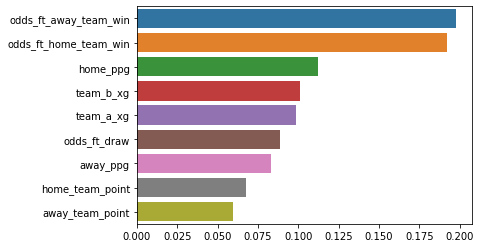

In [251]:
import seaborn as sns

importances_values = clf.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top = importances.sort_values(ascending=False)[:]

sns.barplot(x=top, y=top.index)

In [258]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='logloss', eval_set=evals, verbose=True)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))

[1]	valid_0's multi_logloss: 0.952022
Training until validation scores don't improve for 400 rounds
[2]	valid_0's multi_logloss: 0.920776
[3]	valid_0's multi_logloss: 0.902097
[4]	valid_0's multi_logloss: 0.886367
[5]	valid_0's multi_logloss: 0.87483
[6]	valid_0's multi_logloss: 0.866196
[7]	valid_0's multi_logloss: 0.860313
[8]	valid_0's multi_logloss: 0.854776
[9]	valid_0's multi_logloss: 0.847593
[10]	valid_0's multi_logloss: 0.847135
[11]	valid_0's multi_logloss: 0.842592
[12]	valid_0's multi_logloss: 0.839828
[13]	valid_0's multi_logloss: 0.836497
[14]	valid_0's multi_logloss: 0.835287
[15]	valid_0's multi_logloss: 0.833492
[16]	valid_0's multi_logloss: 0.83259
[17]	valid_0's multi_logloss: 0.834925
[18]	valid_0's multi_logloss: 0.835492
[19]	valid_0's multi_logloss: 0.837046
[20]	valid_0's multi_logloss: 0.838525
[21]	valid_0's multi_logloss: 0.834937
[22]	valid_0's multi_logloss: 0.83205
[23]	valid_0's multi_logloss: 0.837316
[24]	valid_0's multi_logloss: 0.836468
[25]	valid_0's

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(soccer_df_scaled, target, test_size=0.2)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred2 = lr.predict(X_test)

print(accuracy_score(y_test, pred))
print(accuracy_score(y_test, pred2))

y_test, pred

0.618421052631579
0.7236842105263158


(77     0
 113    2
 340    1
 164    2
 292    2
       ..
 371    0
 312    2
 217    2
 181    0
 230    2
 Name: home_team_result, Length: 76, dtype: int64,
 array([0, 2, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
        0, 1, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
        2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2,
        0, 0, 0, 0, 1, 0, 1, 2, 2, 2], dtype=int64))

In [275]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='logloss', eval_set=evals, verbose=True)
pred = lgbm.predict(X_test)
print(accuracy_score(y_test, pred))

[1]	valid_0's multi_logloss: 0.958813
Training until validation scores don't improve for 400 rounds
[2]	valid_0's multi_logloss: 0.930423
[3]	valid_0's multi_logloss: 0.901569
[4]	valid_0's multi_logloss: 0.884735
[5]	valid_0's multi_logloss: 0.868678
[6]	valid_0's multi_logloss: 0.852752
[7]	valid_0's multi_logloss: 0.844476
[8]	valid_0's multi_logloss: 0.832946
[9]	valid_0's multi_logloss: 0.820482
[10]	valid_0's multi_logloss: 0.815009
[11]	valid_0's multi_logloss: 0.805219
[12]	valid_0's multi_logloss: 0.794722
[13]	valid_0's multi_logloss: 0.788349
[14]	valid_0's multi_logloss: 0.782571
[15]	valid_0's multi_logloss: 0.780226
[16]	valid_0's multi_logloss: 0.781542
[17]	valid_0's multi_logloss: 0.7786
[18]	valid_0's multi_logloss: 0.782801
[19]	valid_0's multi_logloss: 0.783239
[20]	valid_0's multi_logloss: 0.783342
[21]	valid_0's multi_logloss: 0.786065
[22]	valid_0's multi_logloss: 0.79286
[23]	valid_0's multi_logloss: 0.791582
[24]	valid_0's multi_logloss: 0.793996
[25]	valid_0's